In [2]:
import numpy as np
import matplotlib.pyplot as plt
from merger_analysis import athena_read as ar
from merger_analysis import OrbitAnalysisUtils as ou
from Constants import Constants
import seaborn as sns
#import deepdish as dd
from astropy.table import Table
#from glob import glob
#from mpl_toolkits.axes_grid1 import ImageGrid
#from tqdm.auto import tqdm

c=Constants()

%matplotlib inline

plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.2
plt.rcParams['legend.labelspacing'] = 0.2
plt.rcParams['legend.handletextpad'] = 0.2
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 16

Constants defined...


In [3]:
def a_RL(q):
    """Eggelton formula, q=M2/M1 (opposite of eggelton deff)"""
    return (0.6*q**(-2./3.) + np.log(1+q**(-1./3.)))/(0.49*q**(-2./3.))

a_RL(0.1) 

1.729598900004333

In [4]:
26*c.rsun/1.e12

1.8083

In [5]:
5.25*c.msun

1.0442250000000001e+34

In [6]:
1.55/a_RL(0.1) 

0.8961615320153805

In [7]:
print(1.2/a_RL(0.125))
afac = 0.67
print( afac*a_RL(0.125)*1.8 )

afac**1.5 # fcorot

0.6722665462583695
2.1527175612927247


0.5484186357154542

In [8]:
np.sqrt( (2*35*c.rsun)**3 / (c.G*8e33) )   /  1.e5

4.648947768495181

In [9]:
(5.25*c.msun * 0.125)*c.G

8.711447062500002e+25

In [10]:
afac = 0.9
print( afac*a_RL(0.125/2)*2.45 )
print( afac*a_RL(0.125)*2.45 )
print( afac*a_RL(0.25)*2.45 )

afac**1.5 # fcorot

3.591846547007099
3.9359388247516245
4.397702656525458


0.8538149682454624

In [11]:
np.sqrt(2*c.G*c.msun*5.25/1.8e12)/1.e5

278.27160293497434

In [12]:
np.sqrt(2*c.G*c.msun*5.25*0.125/3.5e10)/1.e5

705.5472875718536

reading orbit file for binary simulation...


/Users/morganmacleod/Dropbox/CE_princeton/EjectaVelM31/Analysis/merger_analysis/OrbitAnalysisUtils.py:51: RuntimeWarning: invalid value encountered in true_divide
  orb['a12'] = np.array([F12/m2*orb['x']/orb['sep'],
/Users/morganmacleod/Dropbox/CE_princeton/EjectaVelM31/Analysis/merger_analysis/OrbitAnalysisUtils.py:52: RuntimeWarning: invalid value encountered in true_divide
  F12/m2*orb['y']/orb['sep'],
/Users/morganmacleod/Dropbox/CE_princeton/EjectaVelM31/Analysis/merger_analysis/OrbitAnalysisUtils.py:53: RuntimeWarning: invalid value encountered in true_divide
  F12/m2*orb['z']/orb['sep']]).T


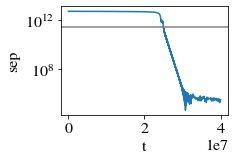

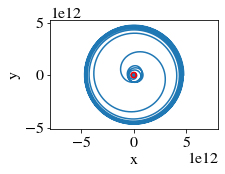

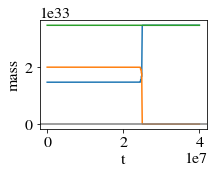

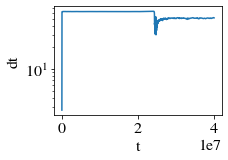

In [13]:
base_dir = "example_sim/"

orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")

rin = 2.45e11
plt.figure(figsize=(3,2))
plt.plot(orb['time'],orb['sep'])
plt.xlabel('t')
plt.ylabel('sep')
plt.axhline(rin,color='grey')
plt.semilogy()
plt.show()

plt.figure(figsize=(3,2))
plt.plot(orb['x'],orb['y'])
pp = np.linspace(0,2*np.pi,1000)
plt.plot( rin*np.cos(pp), rin*np.sin(pp),'r-' )
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(3,2))
plt.plot(orb['time'],orb['m1'])
plt.plot(orb['time'],orb['m2'])
plt.plot(orb['time'],orb['m1']+orb['m2'])
plt.xlabel('t')
plt.ylabel('mass')
plt.axhline(rin,color='grey')
#plt.semilogy()
plt.show()

plt.figure(figsize=(3,2))
plt.plot(orb['time'],orb['dt'])
plt.xlabel('t')
plt.ylabel('dt')
plt.semilogy()
plt.show()

reading orbit file for binary simulation...
read_data...reading file example_sim/HSE.out0.00010.athdf
 ...file read, constructing arrays
 ...gamma= 1.6
...getting cartesian arrays...
...getting energy arrays...
t= 24964666.0
sep/rstar =  0.09981161213379547


/Users/morganmacleod/Dropbox/CE_princeton/EjectaVelM31/Analysis/merger_analysis/OrbitAnalysisUtils.py:394: RuntimeWarning: overflow encountered in power
  resultlist = [-2./eps * (1./3.*u**2 -0.15*u**4 + 0.05*u**5) + 7./(5.*eps),
/Users/morganmacleod/Dropbox/CE_princeton/EjectaVelM31/Analysis/merger_analysis/OrbitAnalysisUtils.py:394: RuntimeWarning: invalid value encountered in add
  resultlist = [-2./eps * (1./3.*u**2 -0.15*u**4 + 0.05*u**5) + 7./(5.*eps),
/Users/morganmacleod/Dropbox/CE_princeton/EjectaVelM31/Analysis/merger_analysis/OrbitAnalysisUtils.py:395: RuntimeWarning: overflow encountered in power
  -1./(15.*r) - 1/eps*( 4./3.*u**2 - u**3 + 0.3*u**4 -1./30.*u**5) + 8./(5.*eps),
/Users/morganmacleod/Dropbox/CE_princeton/EjectaVelM31/Analysis/merger_analysis/OrbitAnalysisUtils.py:395: RuntimeWarning: invalid value encountered in add
  -1./(15.*r) - 1/eps*( 4./3.*u**2 - u**3 + 0.3*u**4 -1./30.*u**5) + 8./(5.*eps),
/Users/morganmacleod/Dropbox/CE_princeton/EjectaVelM31/Analysis/

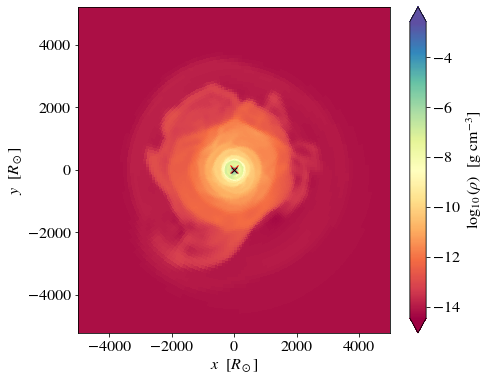

<ipython-input-39-e3f6858cb305>:66: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im=plt.pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/c.rsun,


(-5000.0, 5000.0)

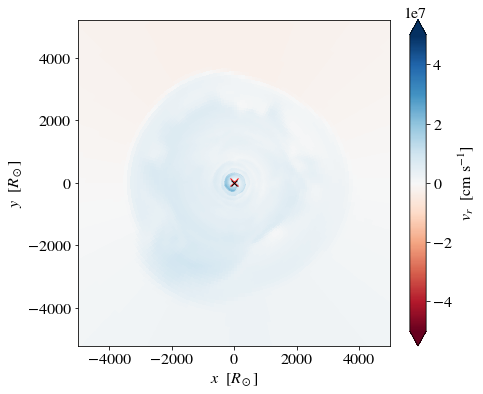

In [39]:
base_dir = "example_sim/"

orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
myfile = base_dir + "HSE.out0.00010.athdf"

lim= 5000
thind = 0
mylevel = None
r0thresh = 0.
velvecs = False
skip = 4
x2slicevalue=ou.get_midplane_theta(myfile,level=mylevel)
d = ou.read_data(myfile,orb,gamma=1.6,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                   get_energy=True,profile_file=base_dir+'hse_profile.dat')
x2,y2,z2 = ou.pos_secondary(orb,d['Time'])
rcom,vcom = ou.rcom_vcom(orb,d['Time'])
print("t=",d['Time'])
print('sep/rstar = ',np.sqrt(x2**2 + y2**2 + z2**2)/2.45e12)

### DENSITY
plt.figure(figsize=(7,6))
im=plt.pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/c.rsun, 
                   ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/c.rsun,
                   ou.get_plot_array_midplane(np.log10(d['rho'])[:,thind,:]), #ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['r0']*d['rho'])[:,thind,:]),np.nan ) ),
           cmap='Spectral',
                  shading='nearest', #shading='gouraud',
                  rasterized=True,zorder=0
        )
cb=plt.colorbar(im,extend='both',label=r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
cb.solids.set_edgecolor('face')

if velvecs:
    plt.quiver(ou.get_plot_array_midplane(d['x'][::skip,thind,::skip]-rcom[0])/c.rsun, 
               ou.get_plot_array_midplane(d['y'][::skip,thind,::skip] -rcom[1])/c.rsun,
               ou.get_plot_array_midplane(d['vx'][::skip,thind,::skip]-vcom[0]), 
               ou.get_plot_array_midplane(d['vy'][::skip,thind,::skip] -vcom[1]) 
              )



#plt.Circle([(x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun],radius=10,color='k',zorder=10) 
plt.plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'rx',markersize=8,zorder=1)
pp = np.linspace(0,2*np.pi,1000)
rr = 1.5e11/c.rsun
plt.plot((x2-rcom[0])/c.rsun + rr*np.cos(pp),(y2-rcom[1])/c.rsun + rr*np.sin(pp),'r-' )

#grid[i].set_ylim(-9e12/c.rsun,7e12/c.rsun)
#grid[i].set_xlim(-9e12/c.rsun,1.4e13/c.rsun)
#sel = (orb['time']>d['Time']-Porb/10) & (orb['time']<=d['Time'])
#l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/c.rsun,(orb[sel]['y']-orb[sel]['ycom'])/c.rsun,'k--')
#l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:')
plt.plot([0],[0],'x',color='pink')
plt.plot(-rcom[0]/c.rsun,-rcom[1]/c.rsun,'kx')

plt.xlabel('$x \ \ [R_\odot]$')
plt.ylabel('$y \ \ [R_\odot]$')
plt.axis('equal')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.show()



### VR
plt.figure(figsize=(7,6))
im=plt.pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/c.rsun, 
                   ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/c.rsun,
                   ou.get_plot_array_midplane(d['vel1'][:,thind,:]), #ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['r0']*d['rho'])[:,thind,:]),np.nan ) ),
                 cmap='RdBu',vmin=-5e7,vmax=5e7,
                  shading='nearest', #shading='gouraud',
                  rasterized=True,zorder=0
        )
cb=plt.colorbar(im,extend='both',label=r'$v_r$  [cm s$^{-1}$]')
cb.solids.set_edgecolor('face')

if velvecs:
    plt.quiver(ou.get_plot_array_midplane(d['x'][::skip,thind,::skip]-rcom[0])/c.rsun, 
               ou.get_plot_array_midplane(d['y'][::skip,thind,::skip] -rcom[1])/c.rsun,
               ou.get_plot_array_midplane(d['vx'][::skip,thind,::skip]-vcom[0]), 
               ou.get_plot_array_midplane(d['vy'][::skip,thind,::skip] -vcom[1]) 
              )



#plt.Circle([(x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun],radius=10,color='k',zorder=10) 
plt.plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'rx',markersize=8,zorder=1)
pp = np.linspace(0,2*np.pi,1000)
rr = 2e11/c.rsun
plt.plot((x2-rcom[0])/c.rsun + rr*np.cos(pp),(y2-rcom[1])/c.rsun + rr*np.sin(pp),'r-' )

#grid[i].set_ylim(-9e12/c.rsun,7e12/c.rsun)
#grid[i].set_xlim(-9e12/c.rsun,1.4e13/c.rsun)
#sel = (orb['time']>d['Time']-Porb/10) & (orb['time']<=d['Time'])
#l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/c.rsun,(orb[sel]['y']-orb[sel]['ycom'])/c.rsun,'k--')
#l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:')
plt.plot([0],[0],'x',color='pink')
plt.plot(-rcom[0]/c.rsun,-rcom[1]/c.rsun,'kx')

plt.xlabel('$x \ \ [R_\odot]$')
plt.ylabel('$y \ \ [R_\odot]$')
plt.axis('equal')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)


read_data...reading file example_sim/HSE.out0.00010.athdf
 ...file read, constructing arrays
 ...gamma= 1.6
...getting cartesian arrays...
...getting energy arrays...
t= 24964666.0
sep/rstar =  0.09981161213379547


<ipython-input-40-2422d09263dc>:17: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im=plt.pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/c.rsun,


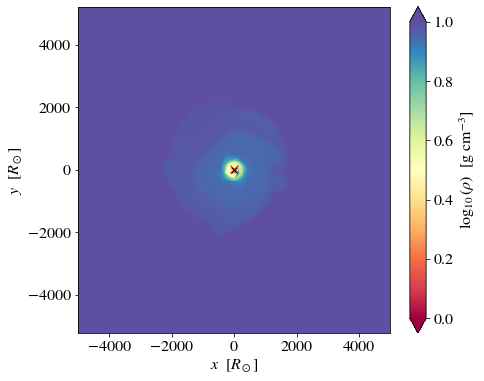

In [40]:
#lim= 3500
thind = 0
mylevel = None
r0thresh = 0.
velvecs = False
skip = 4
x2slicevalue=ou.get_midplane_theta(myfile,level=mylevel)
d = ou.read_data(myfile,orb,gamma=1.6,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                   get_energy=True,profile_file=base_dir+'hse_profile.dat')
x2,y2,z2 = ou.pos_secondary(orb,d['Time'])
rcom,vcom = ou.rcom_vcom(orb,d['Time'])
print("t=",d['Time'])
print('sep/rstar = ',np.sqrt(x2**2 + y2**2 + z2**2)/2.45e12)

### DENSITY
plt.figure(figsize=(7,6))
im=plt.pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/c.rsun, 
                   ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/c.rsun,
                   ou.get_plot_array_midplane(d['r1'][:,thind,:]/2.45e12), #ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['r0']*d['rho'])[:,thind,:]),np.nan ) ),
           cmap='Spectral',
                  shading='nearest', #shading='gouraud',
                  rasterized=True,zorder=0,vmin=0,vmax=1
        )
cb=plt.colorbar(im,extend='both',label=r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
cb.solids.set_edgecolor('face')

if velvecs:
    plt.quiver(ou.get_plot_array_midplane(d['x'][::skip,thind,::skip]-rcom[0])/c.rsun, 
               ou.get_plot_array_midplane(d['y'][::skip,thind,::skip] -rcom[1])/c.rsun,
               ou.get_plot_array_midplane(d['vx'][::skip,thind,::skip]-vcom[0]), 
               ou.get_plot_array_midplane(d['vy'][::skip,thind,::skip] -vcom[1]) 
              )



#plt.Circle([(x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun],radius=10,color='k',zorder=10) 
plt.plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'rx',markersize=8,zorder=1)
pp = np.linspace(0,2*np.pi,1000)
rr = 1.5e11/c.rsun
plt.plot((x2-rcom[0])/c.rsun + rr*np.cos(pp),(y2-rcom[1])/c.rsun + rr*np.sin(pp),'r-' )

#grid[i].set_ylim(-9e12/c.rsun,7e12/c.rsun)
#grid[i].set_xlim(-9e12/c.rsun,1.4e13/c.rsun)
#sel = (orb['time']>d['Time']-Porb/10) & (orb['time']<=d['Time'])
#l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/c.rsun,(orb[sel]['y']-orb[sel]['ycom'])/c.rsun,'k--')
#l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:')
plt.plot([0],[0],'x',color='pink')
plt.plot(-rcom[0]/c.rsun,-rcom[1]/c.rsun,'kx')

plt.xlabel('$x \ \ [R_\odot]$')
plt.ylabel('$y \ \ [R_\odot]$')
plt.axis('equal')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.show()


[]

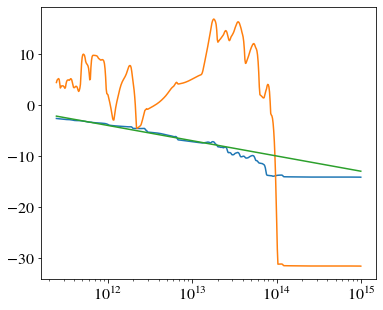

In [14]:
plt.plot(d['x1v'],np.log10(d['rho'])[0,0,:])
plt.plot(d['x1v'],np.log10(d['r0']*d['rho'])[0,0,:])
plt.plot(d['x1v'],np.log10(1e-4*(d['x1v']/1e12)**-3 ) ) 
plt.semilogx()

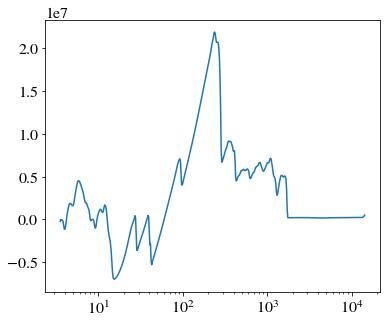

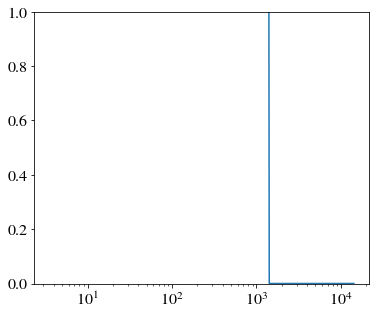

In [15]:
plt.plot(d['x1v']/c.rsun,d['vel1'][0,0,:])
#plt.plot(d['x1v'],d['vel1'][0,0,:]/np.sqrt(c.G*8e33/d['x1v']))
plt.semilogx()
plt.show()

plt.plot(d['x1v']/c.rsun,d['r0'][0,0,:])
plt.ylim(0,1)
plt.semilogx()
plt.show()

In [16]:
3.65e12 * 0.03 / 1e11

1.095

In [17]:
np.sqrt( (35*c.rsun)**3 / (c.G*8e33) ) / 1e5

1.6436512462425052

In [18]:
(3.6e12 - 4.9e11)/1e12

3.11

In [12]:
16*16

256

# Full 3D File

In [41]:
base_dir = "example_sim/"

orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
myfile = base_dir + "HSE.out0.00011.athdf"
lim= 40
thind = 0
mylevel = 0
r0thresh = 0.
velvecs = True
skip = 4
x2slicevalue=ou.get_midplane_theta(myfile,level=mylevel)
d = ou.read_data(myfile,orb,gamma=1.625,level=mylevel,rsoft2=1.5e11,
                   get_energy=True,profile_file=base_dir+'hse_profile.dat')
x2,y2,z2 = ou.pos_secondary(orb,d['Time'])
rcom,vcom = ou.rcom_vcom(orb,d['Time'])
print("t=",d['Time'])
print('sep/rstar = ',np.sqrt(x2**2 + y2**2 + z2**2)/2.45e12)
print('total mass = ',np.sum(d['rho']*d['dvol']*d['r0'])/c.msun)
print('unbound mass =',np.sum( (d['rho']*d['dvol']*d['r0'])[d['etot']>0] ) / c.msun)
print('total mass + m1 ',(np.sum(d['rho']*d['dvol']*d['r0'])+ orb['m1'][0])/c.msun )

reading orbit file for binary simulation...
read_data...reading file example_sim/HSE.out0.00011.athdf
 ...file read, constructing arrays
 ...gamma= 1.625
...getting cartesian arrays...
...getting energy arrays...
t= 40000000.0
sep/rstar =  1.2723438959728117e-07
total mass =  3.320114661648193
unbound mass = 0.6329354190320342
total mass + m1  4.060156893925719


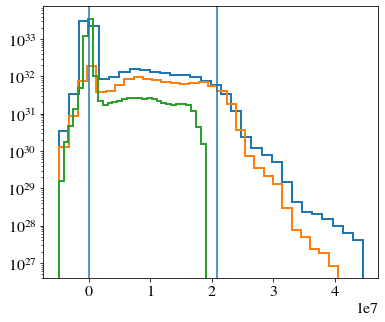

In [59]:
plt.hist( d['vel1'].flatten(),weights=(d['rho']*d['dvol']).flatten(), histtype='step', lw=2,bins=30,density=False )
#plt.hist( d['vel1'].flatten(),weights=(d['rho']*d['dvol']*d['r0']).flatten(), histtype='step', lw=2,bins=30 )
sel = (d['r1']/2.45e12 > 0.6) & (d['r1']/2.45e12 < 1)
plt.hist( d['vel1'][sel].flatten(),weights=(d['rho']*d['dvol'])[sel].flatten(), histtype='step', lw=2,bins=30,density=False )

sel = (d['r1']/2.45e12 < 0.6)
plt.hist( d['vel1'][sel].flatten(),weights=(d['rho']*d['dvol'])[sel].flatten(), histtype='step', lw=2,bins=30,density=False )


plt.semilogy()
vesc = np.sqrt(2*c.G*8e33/2.45e12)
plt.axvline(0)
plt.axvline(vesc)

plt.show()

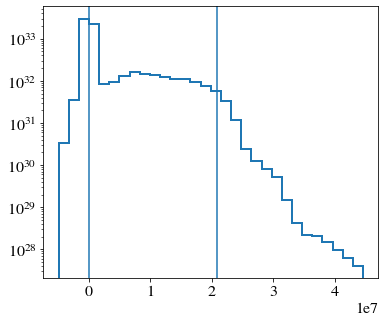

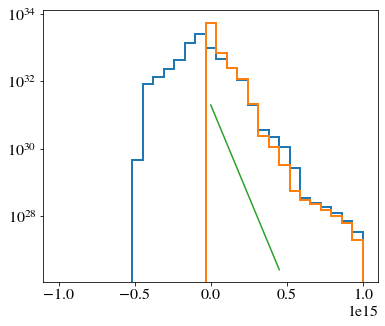

In [42]:
plt.hist((d['etot']/d['rho']).flatten(),weights=(d['rho']*d['dvol']).flatten(), histtype='step', lw=2,bins=np.linspace(-1e15,1e15,30) )
plt.hist((d['ek']/d['rho']).flatten(),weights=(d['rho']*d['dvol']).flatten(), histtype='step', lw=2,bins=np.linspace(-1e15,1e15,30) )
xp = 3e14*np.linspace(0,1.5)
plt.plot(xp,0.01*c.msun*np.exp(-(xp/4e13) ) )
plt.semilogy()
plt.show()

In [33]:
np.sum(d['rho']*d['dvol']*d['r0'])/c.msun

3.320114661648193

In [116]:
np.argmax(d['r0'],keepdims=True)

array([[[254]]])

In [114]:
d['r0'].shape

(384, 192, 512)

In [118]:
d['r0'].flatten()

inf

In [120]:
d['gx1v'].flatten()[254] / 1e12

14.78278774784

In [121]:
d['gx2v'].flatten()[254]

0.010908281

In [122]:
d['gx3v'].flatten()[254]

0.008181231

In [135]:
d['r0'].shape

(384, 192, 512)

<ipython-input-148-afa243c06a5d>:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im=plt.pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/c.rsun,


(-100.0, 100.0)

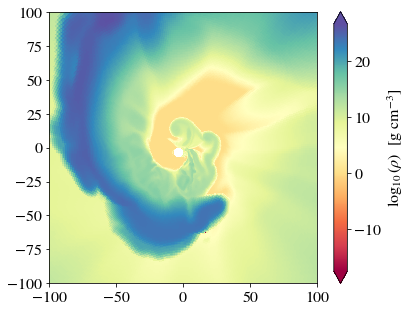

In [148]:
thind = 96
im=plt.pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/c.rsun, 
                   ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/c.rsun,
                   ou.get_plot_array_midplane(np.log10(d['r0'][:,thind,:])), #ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['r0']*d['rho'])[:,thind,:]),np.nan ) ),
                   cmap='Spectral',
                  shading='nearest', #shading='gouraud',
                  rasterized=True,zorder=0
        )
plt.colorbar(im,extend='both',label=r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
#cb.solids.set_edgecolor('face')
plt.xlim(-100,100)
plt.ylim(-100,100)

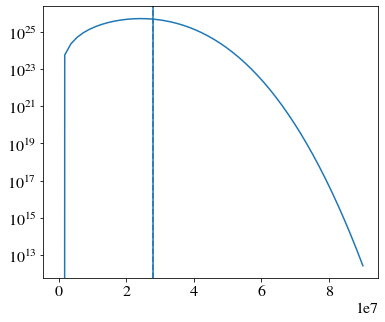

In [227]:
vesc = np.sqrt(2*c.G*c.msun*5.25/(1.8e12))
plt.axvline(vesc)
vscale = vesc
xp = 1e7*np.linspace(0,9)
plt.semilogy(xp,3*0.6*c.msun/vscale* (xp/vscale)**2 *np.exp(-(xp/vscale)**3 ) )
#plt.ylim(1e25,1e34)
plt.axvline(vscale,ls='--')



In [215]:
10*c.au / (50*86400)

34629629.62962963